# Bird Flu Classification

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d jasmeet0516/bird-flu-dataset-avian-influenza

Dataset URL: https://www.kaggle.com/datasets/jasmeet0516/bird-flu-dataset-avian-influenza
License(s): MIT
100%|█████████████████████████████████████████| 245k/245k [00:01<00:00, 235kB/s]
100%|█████████████████████████████████████████| 245k/245k [00:01<00:00, 234kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Bird Flu Classification/bird-flu-dataset-avian-influenza.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Bird Flu Classification')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("Avian Influenza (HPAI).csv")

In [18]:
df = df.head(2000)

In [19]:
df.shape

(2000, 17)

In [20]:
df.size

34000

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _id                   2000 non-null   int64  
 1   Scientific_Name       2000 non-null   object 
 2   Common_Name           2000 non-null   object 
 3   Date                  2000 non-null   object 
 4   Year                  2000 non-null   int64  
 5   Month                 2000 non-null   int64  
 6   Day                   2000 non-null   int64  
 7   Time                  2000 non-null   int64  
 8   Country               2000 non-null   object 
 9   Country_State_County  2000 non-null   object 
 10  State                 2000 non-null   object 
 11  County                1992 non-null   object 
 12  Locality              2000 non-null   object 
 13  Latitude              2000 non-null   float64
 14  Longitude             2000 non-null   float64
 15  Parent_Species       

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
_id,2000.0,1000.500000,577.494589,1.0000,500.7500,1000.50000,1500.2500,2000.0000
Year,2000.0,2015.171500,2.786749,1999.0000,2015.0000,2016.00000,2017.0000,2017.0000
Month,2000.0,7.041000,2.674490,1.0000,5.0000,7.00000,9.0000,12.0000
Day,2000.0,15.333000,8.695166,1.0000,8.0000,16.00000,22.0000,31.0000
Time,2000.0,1057.348000,449.412078,0.0000,830.0000,1044.00000,1330.0000,2100.0000
Latitude,2000.0,52.879905,0.726489,51.4396,52.1953,53.07700,53.3549,55.2580
Longitude,2000.0,-8.124051,1.591642,-10.6629,-9.5424,-8.49755,-6.2741,-6.0024
target_H5_HPAI,2000.0,0.146000,0.353195,0.0000,0.0000,0.00000,0.0000,1.0000


In [23]:
df.isnull().sum()

_id                     0
Scientific_Name         0
Common_Name             0
Date                    0
Year                    0
Month                   0
Day                     0
Time                    0
Country                 0
Country_State_County    0
State                   0
County                  8
Locality                0
Latitude                0
Longitude               0
Parent_Species          0
target_H5_HPAI          0
dtype: int64

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df.nunique()

_id                     2000
Scientific_Name          205
Common_Name              205
Date                     344
Year                      15
Month                     12
Day                       31
Time                     207
Country                    1
Country_State_County      22
State                      4
County                    21
Locality                 341
Latitude                 346
Longitude                351
Parent_Species           168
target_H5_HPAI             2
dtype: int64

In [26]:
df['target_H5_HPAI'].value_counts()

target_H5_HPAI
0    1708
1     292
Name: count, dtype: int64

## Data Visualization

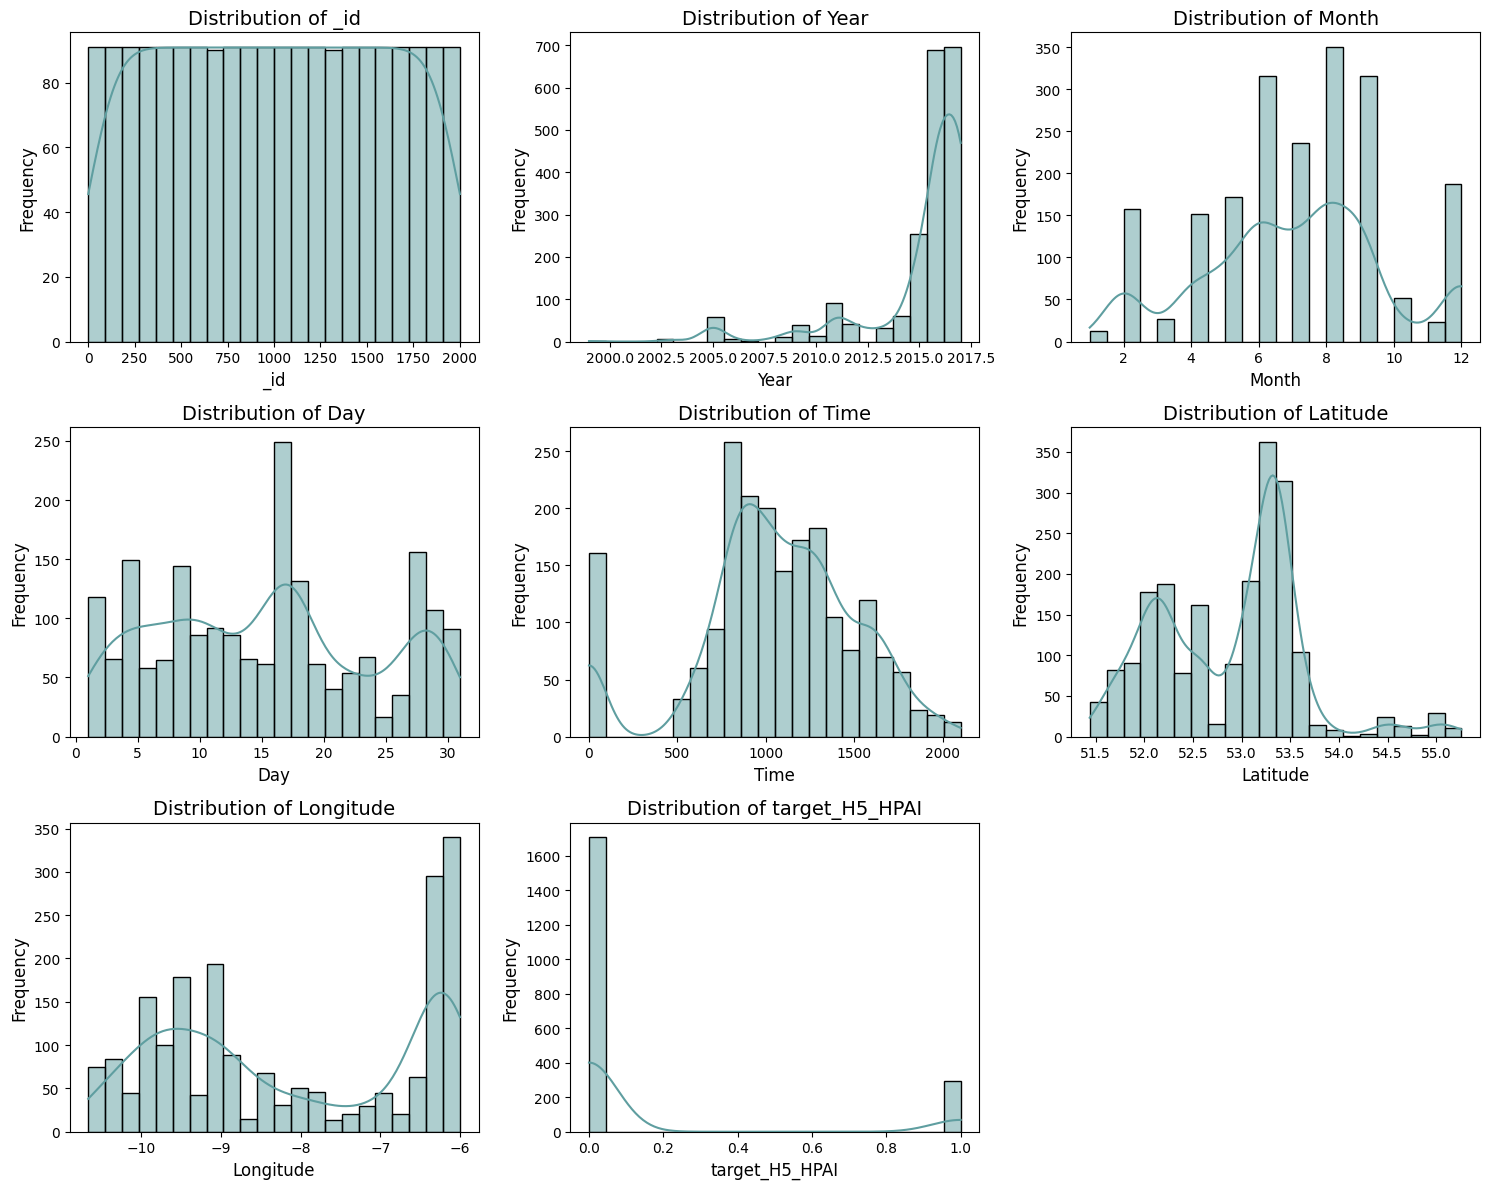

In [27]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Ensure we don't exceed the number of axes
        sns.histplot(df[col], bins=22, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel("Frequency", fontsize=12)
        axes[i].set_title(f"Distribution of {col}", fontsize=14)

# Remove any unused axes
if len(axes) > len(numerical_cols):
    for j in range(len(numerical_cols), len(axes)):
        axes[j].remove()

plt.tight_layout()
plt.show()

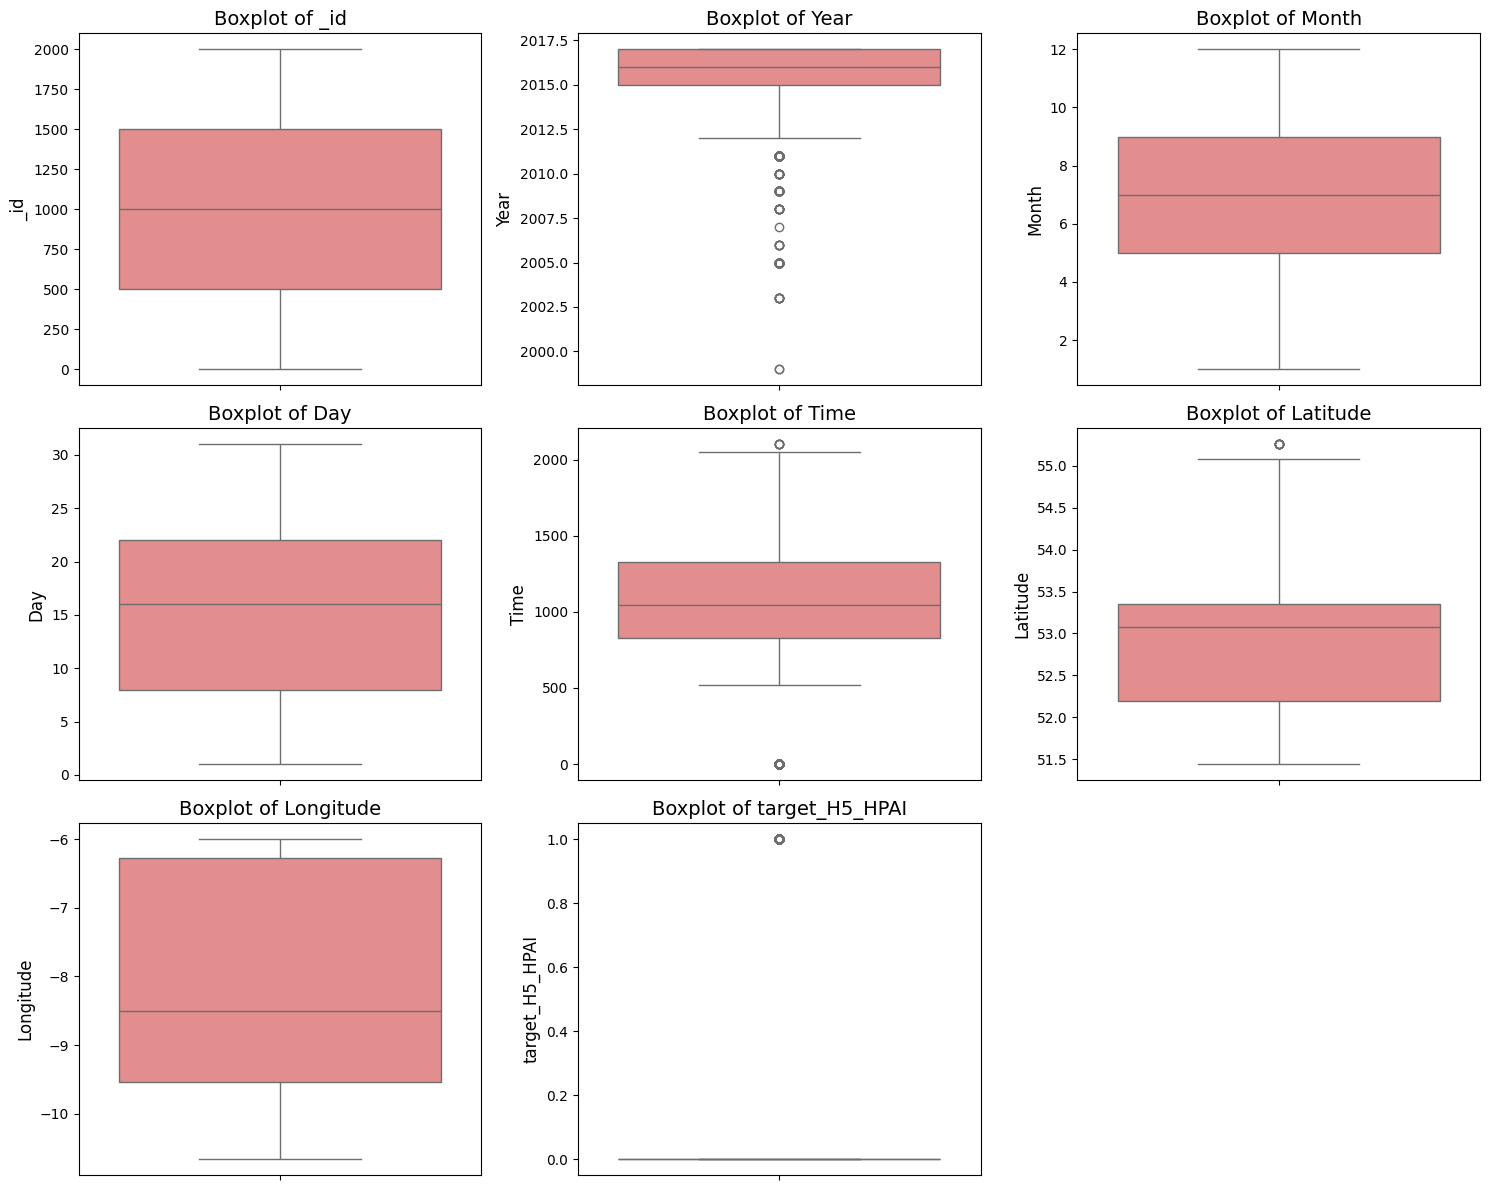

In [28]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

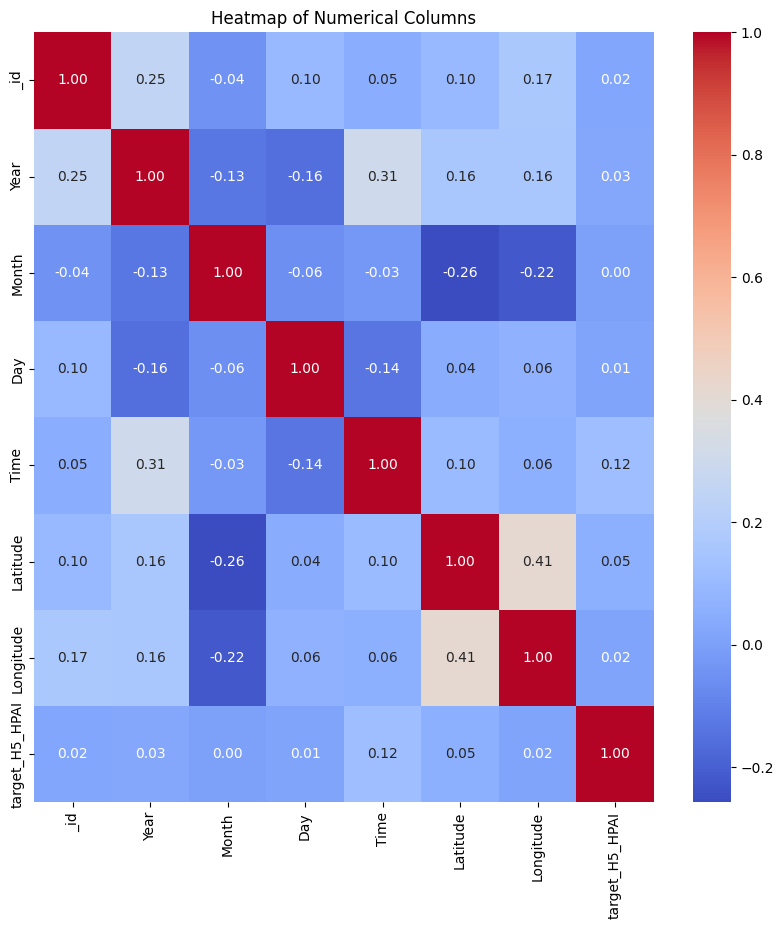

In [30]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [31]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [32]:
X = df.drop(columns=['target_H5_HPAI'])
y = df['target_H5_HPAI']

In [33]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Smote

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

## Model Evaluation

In [35]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [36]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [37]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.65, 0.6975, 0.9425, 0.935, 0.69, 0.8875, 0.9325, 0.8975, 0.6225]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.67      0.76       341
           1       0.22      0.56      0.32        59

    accuracy                           0.65       400
   macro avg       0.56      0.61      0.54       400
weighted avg       0.80      0.65      0.70       400

Confusion Matrix:
 [[227 114]
 [ 26  33]]


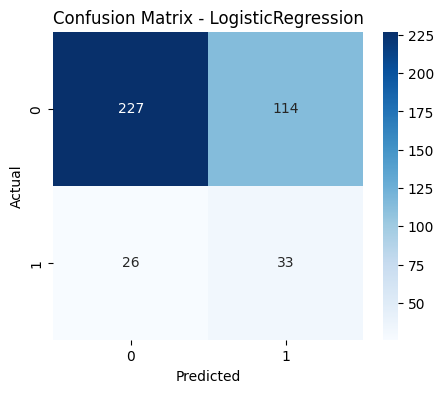

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.71      0.80       341
           1       0.28      0.64      0.39        59

    accuracy                           0.70       400
   macro avg       0.60      0.68      0.59       400
weighted avg       0.82      0.70      0.74       400

Confusion Matrix:
 [[241 100]
 [ 21  38]]


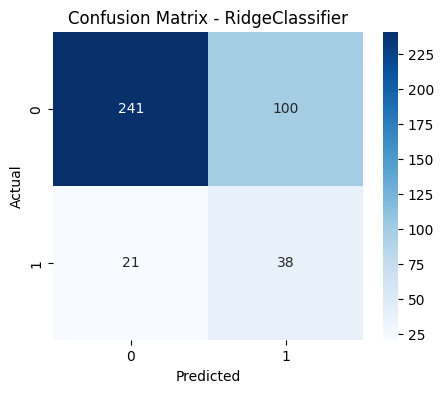

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       341
           1       0.83      0.76      0.80        59

    accuracy                           0.94       400
   macro avg       0.90      0.87      0.88       400
weighted avg       0.94      0.94      0.94       400

Confusion Matrix:
 [[332   9]
 [ 14  45]]


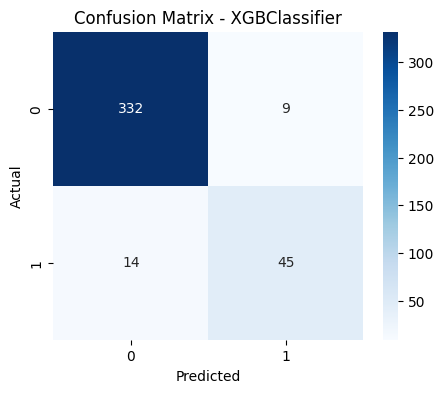

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       341
           1       0.81      0.73      0.77        59

    accuracy                           0.94       400
   macro avg       0.88      0.85      0.87       400
weighted avg       0.93      0.94      0.93       400

Confusion Matrix:
 [[331  10]
 [ 16  43]]


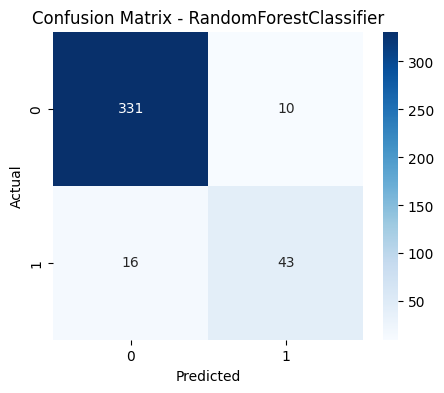

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.68      0.79       341
           1       0.29      0.75      0.42        59

    accuracy                           0.69       400
   macro avg       0.61      0.71      0.60       400
weighted avg       0.84      0.69      0.73       400

Confusion Matrix:
 [[232 109]
 [ 15  44]]


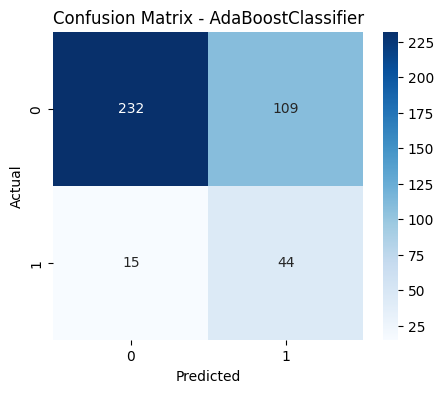

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       341
           1       0.59      0.81      0.68        59

    accuracy                           0.89       400
   macro avg       0.78      0.86      0.81       400
weighted avg       0.91      0.89      0.89       400

Confusion Matrix:
 [[307  34]
 [ 11  48]]


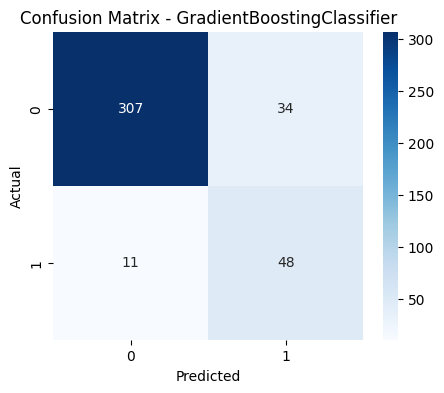

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       341
           1       0.82      0.71      0.76        59

    accuracy                           0.94       400
   macro avg       0.89      0.84      0.86       400
weighted avg       0.93      0.94      0.93       400

Confusion Matrix:
 [[332   9]
 [ 17  42]]


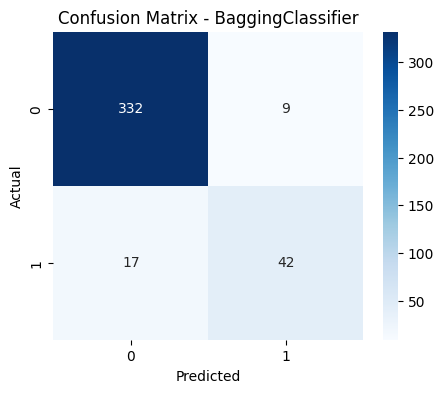

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       341
           1       0.65      0.73      0.69        59

    accuracy                           0.90       400
   macro avg       0.80      0.83      0.82       400
weighted avg       0.91      0.90      0.90       400

Confusion Matrix:
 [[318  23]
 [ 16  43]]


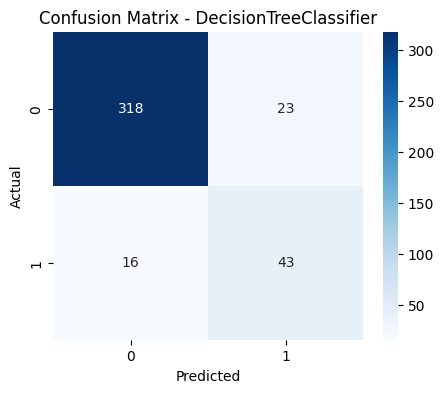

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.60      0.73       341
           1       0.24      0.73      0.36        59

    accuracy                           0.62       400
   macro avg       0.58      0.67      0.55       400
weighted avg       0.83      0.62      0.68       400

Confusion Matrix:
 [[206 135]
 [ 16  43]]


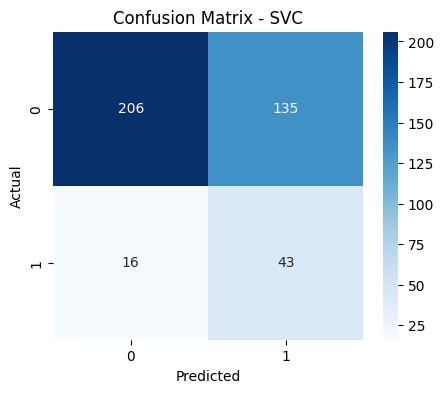

In [38]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()